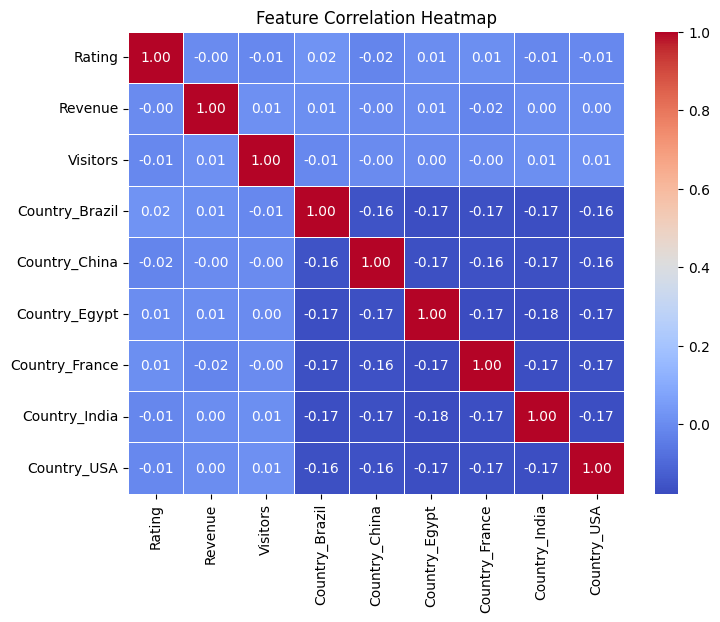

0.02373710609130482
0.02373710609130482 0.045791269637563116
0.02373710609130482 0.045791269637563116 0.026360223117718976
Best Model: Linear Regression with MSE: 0.023737


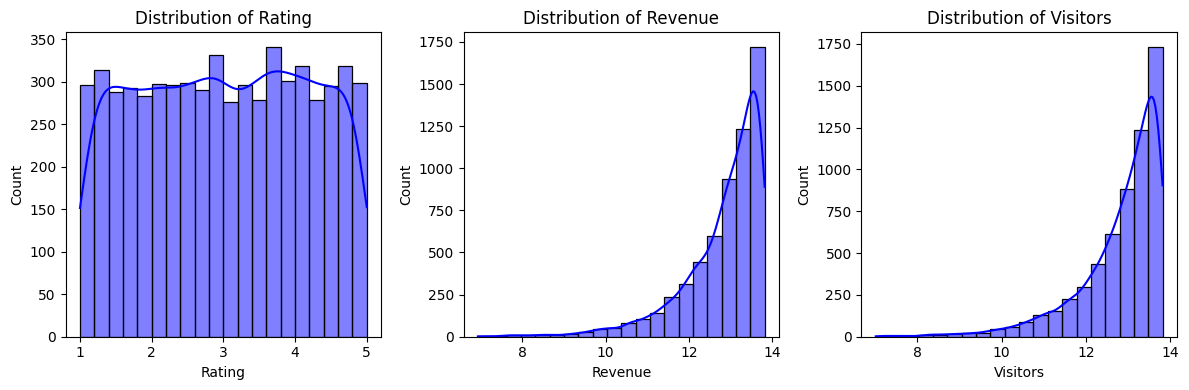

Best model and encoders saved successfully!


In [10]:
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# Load and Preprocess Dataset
# ------------------------------
df = pd.read_csv('tourism_dataset.csv')

# Drop unnecessary columns
df.drop(columns=['Location'], inplace=True, errors='ignore')

# Keep relevant columns: Rating, Revenue, Country, Visitors
df = df[['Rating', 'Revenue', 'Country', 'Visitors']]

# Log-transform Revenue and Visitors
df['Revenue'] = np.log1p(df['Revenue'])
df['Visitors'] = np.log1p(df['Visitors'])

# One-Hot Encode Country
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
encoded_countries = encoder.fit_transform(df[['Country']])
country_feature_names = encoder.get_feature_names_out(['Country'])

# Convert to DataFrame and merge
encoded_df = pd.DataFrame(encoded_countries, columns=country_feature_names)
df = pd.concat([df.drop(columns=['Country']), encoded_df], axis=1)

# Define features and target
X = df.drop(columns=['Visitors'])
y = df['Visitors']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()


# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# ------------------------------
# Train Models
# ------------------------------

# 1️⃣ Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_scaled)
y_pred_lin = lin_reg.predict(X_test_scaled)
mse_lin = mean_squared_error(y_test_scaled, y_pred_lin)
print(mse_lin)

# 2️⃣ Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train_scaled)
y_pred_dt = dt.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test_scaled, y_pred_dt)
print(mse_lin, mse_dt)

# 3️⃣ Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train_scaled)
y_pred_rf = rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test_scaled, y_pred_rf)
print(mse_lin, mse_dt, mse_rf)

# ------------------------------
# Compare and Save Best Model
# ------------------------------
mse_scores = {
    "Linear Regression": mse_lin,
    "Decision Tree": mse_dt,
    "Random Forest": mse_rf
}

best_model_name = min(mse_scores, key=mse_scores.get)  # Get model with lowest MSE
best_model = {"Linear Regression": lin_reg, "Decision Tree": dt, "Random Forest": rf}[best_model_name]

print(f"Best Model: {best_model_name} with MSE: {mse_scores[best_model_name]:.6f}")


# Histograms of important features
features = ['Rating', 'Revenue', 'Visitors']

plt.figure(figsize=(12, 4))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], bins=20, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# Save the best model and encoders
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')
joblib.dump(encoder, 'country_encoder.pkl')

print("Best model and encoders saved successfully!")



In [12]:
# Select one row from the test set
sample_index = 0
single_input = X_test.iloc[sample_index:sample_index+1]

# Scale the input
single_input_scaled = scaler_X.transform(single_input)

# Predict using the best model
single_prediction_scaled = best_model.predict(single_input_scaled)

# Inverse transform the MinMax scaling
single_prediction_unscaled = scaler_y.inverse_transform(
    np.array(single_prediction_scaled).reshape(-1, 1)
)[0][0]

# Apply expm1() to reverse log transformation
final_prediction = np.expm1(single_prediction_unscaled)

print(f"Predicted Visitors for Sample Data Point: {final_prediction:.2f}")


Predicted Visitors for Sample Data Point: 378069.82


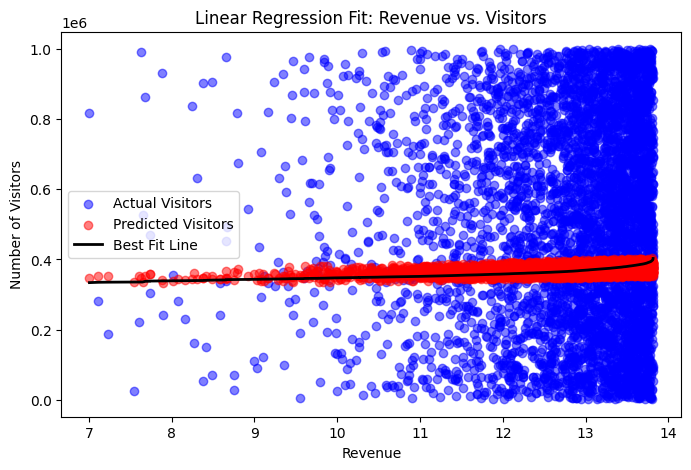

In [14]:
import matplotlib.pyplot as plt

# Get the Revenue feature (before scaling)
revenue = X_train['Revenue']
visitors_actual = y_train  # Actual Visitors in log scale

# Predict Visitors using the Linear Regression model
visitors_predicted_scaled = lin_reg.predict(scaler_X.transform(X_train))
visitors_predicted = scaler_y.inverse_transform(
    np.array(visitors_predicted_scaled).reshape(-1, 1)
).flatten()

# Reverse log transformation
visitors_actual = np.expm1(visitors_actual)
visitors_predicted = np.expm1(visitors_predicted)

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(revenue, visitors_actual, color='blue', label="Actual Visitors", alpha=0.5)
plt.scatter(revenue, visitors_predicted, color='red', label="Predicted Visitors", alpha=0.5)

# Best fit line
plt.plot(sorted(revenue), sorted(visitors_predicted), color="black", linewidth=2, label="Best Fit Line")

plt.xlabel("Revenue")
plt.ylabel("Number of Visitors")
plt.title("Linear Regression Fit: Revenue vs. Visitors")
plt.legend()
plt.show()


In [ ]:
from google.colab import files

files.download("best_model.pkl")
files.download("scaler_X.pkl")
files.download("scaler_y.pkl")
files.download('country_encoder.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>